# Вариант 4

### MNIST
### KNN и Softmax

In [1]:
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()

In [2]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

Число 0:


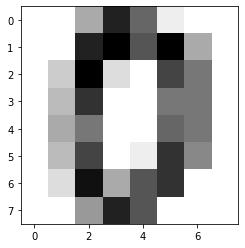

Число 1:


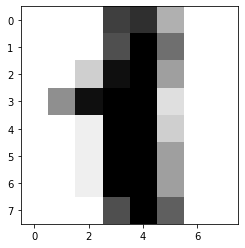

Число 2:


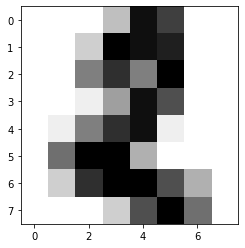

Число 3:


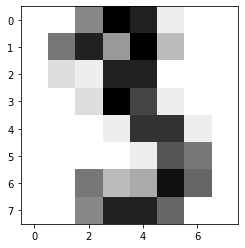

Число 4:


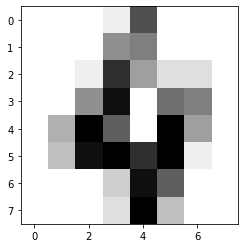

Число 5:


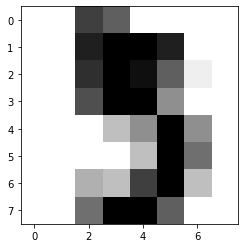

Число 6:


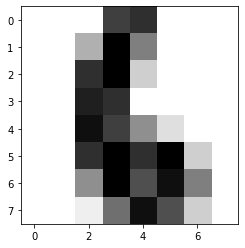

Число 7:


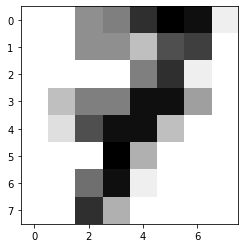

Число 8:


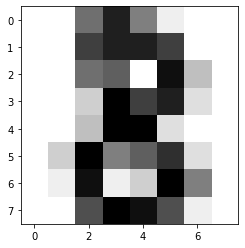

Число 9:


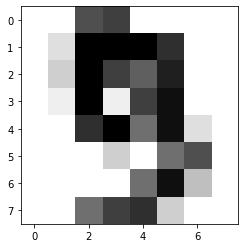

In [3]:
import matplotlib.pyplot as plt

# примеры исходных данных
for i in digits['target_names']:
    for j in range(len(digits['target'])):
        if digits['target'][j] == i:
            print('Число '+ str(i) + ':')
            plt.imshow(digits['images'][j], cmap='binary')
            plt.show()
            break

In [4]:
# shuffle and split
X = np.array(digits['data'])
Y = np.array(digits['target'])

p = np.random.RandomState(seed=123).permutation(len(X))

X = X[p]
Y = Y[p]

Xtrain = X[:int(len(X)*0.75)]
Xtest = X[int(len(X)*0.75):]
Ytrain = Y[:int(len(X)*0.75)]
Ytest = Y[int(len(X)*0.75):]

print(len(Xtrain), len(Xtest), len(X))

1347 450 1797


In [10]:
class myKNN(object):
    
    def __init__(self):
        pass
    
    def fit(self, X, Y):
        self.Xtrain = X
        self.Ytrain = Y
    
    def predict(self, X, k=5):

        dists = self._l2Distance(X)
        yPredict = np.zeros((X.shape[0],))
        
        for i in range(X.shape[0]):
            yPredict[i] = np.argmax(np.bincount(self.Ytrain[np.argsort(dists[:,i])[:k]]))
            
        return yPredict
        
    def _l2Distance(self, X):
        dists = np.sum(self.Xtrain**2, axis=1).reshape(self.Xtrain.shape[0],1) - 2*self.Xtrain@X.T + np.sum(X**2, axis=1).reshape(1,X.shape[0])
        return dists

In [11]:
# тестим
model = myKNN()
model.fit(Xtrain, Ytrain)

labels = model.predict(Xtest)

In [12]:
def accuracyScore(Ytrue, Ypred):
    return np.sum(Ytrue==Ypred)/Ytrue.shape[0]

# доля правильно классифицированных
accuracyScore(Ytest, labels)

0.9866666666666667

<AxesSubplot:>

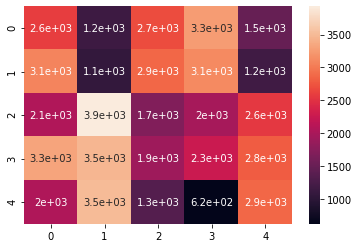

In [13]:
import seaborn as sns

# визуализация матрицы растояний(часть матрицы)
dists = model._l2Distance(Xtest)
sns.heatmap(dists[:5,:5], annot=True)

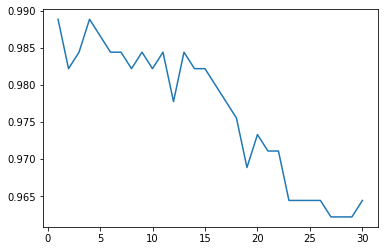

In [14]:
# график зависимости правильно классифицированных от числа соседей

krange = np.arange(30) + 1
scores = np.zeros((30,))

for i in krange:
    scores[i-1] = accuracyScore(Ytest, model.predict(Xtest, i))
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(krange, scores)
plt.show()

In [15]:
def myCrossVal(X, Y, k, cv=5, trainPercent=0.9):
    
    scores = np.zeros((cv,))
    
    for i in range(cv):
        p = np.random.permutation(len(X))
        X = X[p]
        Y = Y[p]

        Xtrain = X[:int(len(X)*trainPercent)]
        Xtest = X[int(len(X)*trainPercent):]
        Ytrain = Y[:int(len(X)*trainPercent)]
        Ytest = Y[int(len(X)*trainPercent):]
        
        model = myKNN()
        
        model.fit(Xtrain, Ytrain)
        labels = model.predict(Xtest, k)
        
        scores[i] = accuracyScore(Ytest, labels)
        
    return scores.mean()

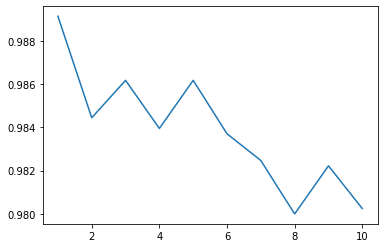

In [16]:
krange = np.arange(10) + 1
scores = np.zeros((10,))

for i in krange:
    scores[i-1] = myCrossVal(X,Y,i,9,0.75)
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(krange, scores)
plt.show()
# вообще от запуска к запуску результаты разнятся, но я бы сказал что лучшее число k это 5 или 3, чаще 3

# Softmax

In [17]:
# 3.1 train test val split
def TTVsplit(X, Y, TrainLen=0.70, TestLen=0.2):
    if TrainLen+TestLen >= 1:
        return
    TrainLen = int(len(X)*TrainLen)
    TestLen = int(len(X)*TestLen)

    Xtrain = X[:TrainLen]
    Xtest = X[TrainLen:TrainLen+TestLen]
    Xval = X[TrainLen+TestLen:]
    Ytrain = Y[:TrainLen]
    Ytest = Y[TrainLen:TrainLen+TestLen]
    Yval = Y[TrainLen+TestLen:]
    
    return Xtrain, Xtest, Xval, Ytrain, Ytest, Yval

Xtrain, Xtest, Xval, Ytrain, Ytest, Yval = TTVsplit(X.copy(),Y.copy())
print(len(Xtrain)+len(Xtest)+len(Xval), len(X))

1797 1797


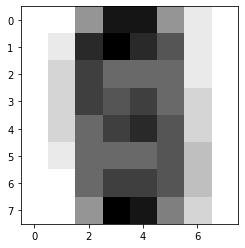

(1257, 65) (181, 65) (359, 65)


In [18]:
# 3.2 3.3 Подготовка в соответствие с заданием 
meanImage = np.mean(Xtrain, axis=0)
plt.imshow(meanImage.reshape((8,8,1)).astype('uint8'), cmap='binary') 
plt.show()

Xtrain -= meanImage
Xval -= meanImage
Xtest -= meanImage

# расширяем на 1, для коэф. b
Xtrain = np.hstack([Xtrain, np.ones((Xtrain.shape[0], 1))])
Xval = np.hstack([Xval, np.ones((Xval.shape[0], 1))])
Xtest = np.hstack([Xtest, np.ones((Xtest.shape[0], 1))])

print(Xtrain.shape, Xval.shape, Xtest.shape)

In [19]:
def softmaxLoss(W, X, Y, reg):
    loss = 0.0
    
    dW = np.zeros_like(W)

    score = X@W
    
    prob = np.exp(score) / np.sum(np.exp(score), axis=1, keepdims=True)
    loss = np.mean(-np.log(prob[np.arange(X.shape[0]),Y]))
    loss += reg * np.sum(W * W)
    
    # (Si - dyi)Xj
    prob[np.arange(X.shape[0]),Y]-=1
    prob/=X.shape[0]
    dW = X.T@prob + 2*reg*W
    return loss, dW

In [20]:
# в W будет находиться еще и b
W = np.random.randn(65, 10) * 0.0001
loss, grad = softmaxLoss(W, Xtrain, Ytrain, 0.0)

# As a rough sanity check, our loss should be something close to -log(0.1).
# ну если смотреть только порядки, то в целом сойдет
print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))

loss: 2.301851
sanity check: 2.302585


In [21]:
# проверка градиента из методички(численные методы)
from random import randrange

def grad_check_sparse(f, x, analytic_grad, num_checks=10, h=1e-5):

    for i in range(num_checks):
        ix = tuple([randrange(m) for m in x.shape])

        oldval = x[ix]
        x[ix] = oldval + h # increment by h
        fxph = f(x) # evaluate f(x + h)
        x[ix] = oldval - h # increment by h
        fxmh = f(x) # evaluate f(x - h)
        x[ix] = oldval # reset

        grad_numerical = (fxph - fxmh) / (2 * h)
        grad_analytic = analytic_grad[ix]
        rel_error = (abs(grad_numerical - grad_analytic) / (abs(grad_numerical) + abs(grad_analytic)))
        print('numerical: %f analytic: %f, relative error: %e' %(grad_numerical, grad_analytic, rel_error))

# кажется все верно, порядок ошибки довольно мал
f = lambda w: softmaxLoss(w, Xtrain, Ytrain, 0.0)[0]
grad_check_sparse(f, W, grad, 10)

numerical: -0.012552 analytic: -0.012552, relative error: 6.303331e-09
numerical: -0.437681 analytic: -0.437681, relative error: 1.498526e-10
numerical: 0.313439 analytic: 0.313439, relative error: 2.061615e-10
numerical: -0.318701 analytic: -0.318701, relative error: 1.287456e-10
numerical: -0.419594 analytic: -0.419594, relative error: 1.792329e-10
numerical: -0.037739 analytic: -0.037739, relative error: 2.330936e-10
numerical: 0.196385 analytic: 0.196385, relative error: 3.738663e-10
numerical: -0.291287 analytic: -0.291287, relative error: 1.833390e-10
numerical: 0.011382 analytic: 0.011382, relative error: 4.482796e-10
numerical: 0.194810 analytic: 0.194810, relative error: 2.409989e-10


In [22]:
class softmaxClassifier(object):
    
    def __init__(self):
        self.W = None
        
    def fit(self, X, Y, learningRate=1e-3, reg=1e-5, numIters=100, batchSize=200, verbose=True):
        
        numTrain, numFeatures = X.shape
        numClasses = np.max(Y) + 1
        
        self.W = 0.001 * np.random.randn(numFeatures, numClasses)
        
        for i in range(numIters):
            
            index = np.random.choice(numTrain, batchSize)
            Xbatch = X[index]
            Ybatch = Y[index]
            
            loss, grad = softmaxLoss(self.W, Xbatch, Ybatch, reg)
            
            self.W -= learningRate*grad
            if (verbose == True and i%10 == 0):
                print('Iteration: '+str(i)+" loss: "+str(loss))
                
    def predict(self, X):
        result = np.argmax(X@self.W, axis=1)
        return result

In [23]:
model = softmaxClassifier()
model.fit(Xtrain, Ytrain)
print('score: ', accuracyScore(Ytest,model.predict(Xtest)))

Iteration: 0 loss: 2.3065678674043895
Iteration: 10 loss: 1.8347858257122485
Iteration: 20 loss: 1.5154101616124418
Iteration: 30 loss: 1.320678575966513
Iteration: 40 loss: 1.050180448346254
Iteration: 50 loss: 0.968912149530531
Iteration: 60 loss: 0.9498125056919858
Iteration: 70 loss: 0.7680224278480796
Iteration: 80 loss: 0.7177250986438297
Iteration: 90 loss: 0.6490710418886456
score:  0.9025069637883009


In [24]:
# по заданию нужно подобрать лучшие параметры регуляризации и скорости обучения при помощи кросс валидации
# я не совсем понял зачем нужен был сплит на train test val и как это должно работать в кросс валидации,
# сделаю grid search с кросс валидацией думаю это подойдет

def myGridSearch(X, Y, learningRate, reg, cv=5, trainPercent=0.8):
    
    scores = {}
    cvScore = np.zeros((cv,))
    
    for rateParam in learningRate:
        for regParam in reg:
            for i in range(cv):
                p = np.random.permutation(len(X))
                X = X[p]
                Y = Y[p]

                Xtrain = X[:int(len(X)*trainPercent)]
                Xtest = X[int(len(X)*trainPercent):]
                Ytrain = Y[:int(len(X)*trainPercent)]
                Ytest = Y[int(len(X)*trainPercent):]

                model = softmaxClassifier()
                model.fit(Xtrain, Ytrain, learningRate=rateParam,reg=regParam,verbose=False)
                labels = model.predict(Xtest)
                
                cvScore[i] = accuracyScore(Ytest, labels)
            scores[(rateParam, regParam)] = np.mean(cvScore)
    
    best = {i for i, v in scores.items() if v == max(scores.values())}
    return scores, best

In [25]:
newX = np.vstack((Xtrain,Xval,Xtest))
newY = np.hstack((Ytrain,Yval,Ytest))

newX = np.hstack([newX, np.ones((newX.shape[0], 1))])

result, best = myGridSearch(newX,newY,learningRate=[1e-2,1e-3,1e-4,1e-5],reg=[1e-2,1e-3,1e-4,1e-5])
best

{(0.01, 0.0001), (0.01, 0.001)}

<AxesSubplot:>

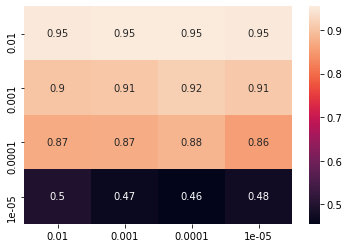

In [26]:
# недообучаемся при маленьком learning rate
sns.heatmap(np.fromiter(result.values(), dtype='float32').reshape(4,4),annot=True, xticklabels=[1e-2,1e-3,1e-4,1e-5],yticklabels=[1e-2,1e-3,1e-4,1e-5])

# Заключение
В целом KNN работает лучше, но и у метода градиентного спуска весьма неплохие результаты, учитывая что это просто линейный классификатор

In [27]:
x = np.zeros((10,10))
[randrange(m) for m in x.shape]

[3, 4]